In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#bring in the csv and show what the file looks like
file_path = '/Users/ncabayan/Desktop/final_project_stuff/API_PULL/ninja_twitch_pull.csv'
file_path_df = pd.read_csv(file_path, encoding = 'UTF-8')
file_path_df

,Unnamed: 0,time,total_views,stream_viewers
0,0,12:23 PM,393500921,NaN
1,0,1:23 PM,393509466,122861.0
2,0,2:23 PM,394005259,148687.0
3,0,3:23 PM,394294748,175163.0
4,0,4:23 PM,394710151,186953.0
5,0,5:23 PM,395019218,190954.0
6,0,6:23 PM,395455032,138772.0
7,0,7:23 PM,395705528,142017.0
8,0,8:23 PM,396024213,175028.0
9,0,9:23 PM,396357748,150747.0


In [3]:
#remove the unnamed column and only show the three important columsn
ninja_scrape_edited_df = file_path_df[["time","total_views","stream_viewers"]]
ninja_scrape_edited_df

,time,total_views,stream_viewers
0,12:23 PM,393500921,NaN
1,1:23 PM,393509466,122861.0
2,2:23 PM,394005259,148687.0
3,3:23 PM,394294748,175163.0
4,4:23 PM,394710151,186953.0
5,5:23 PM,395019218,190954.0
6,6:23 PM,395455032,138772.0
7,7:23 PM,395705528,142017.0
8,8:23 PM,396024213,175028.0
9,9:23 PM,396357748,150747.0


In [4]:
#rename the columns
ninja_scrape = ninja_scrape_edited_df.rename(columns = {"time":"Pacific Standard Time","total_views":"Total Views", "stream_viewers":"Stream Viewers"})
ninja_scrape

,Pacific Standard Time,Total Views,Stream Viewers
0,12:23 PM,393500921,NaN
1,1:23 PM,393509466,122861.0
2,2:23 PM,394005259,148687.0
3,3:23 PM,394294748,175163.0
4,4:23 PM,394710151,186953.0
5,5:23 PM,395019218,190954.0
6,6:23 PM,395455032,138772.0
7,7:23 PM,395705528,142017.0
8,8:23 PM,396024213,175028.0
9,9:23 PM,396357748,150747.0


In [5]:
minutes_watched = ninja_scrape["Stream Viewers"]*60
ninja_scrape["Minutes Watched"] = minutes_watched
ninja_scrape

,Pacific Standard Time,Total Views,Stream Viewers,Minutes Watched
0,12:23 PM,393500921,NaN,NaN
1,1:23 PM,393509466,122861.0,7371660.0
2,2:23 PM,394005259,148687.0,8921220.0
3,3:23 PM,394294748,175163.0,10509780.0
4,4:23 PM,394710151,186953.0,11217180.0
5,5:23 PM,395019218,190954.0,11457240.0
6,6:23 PM,395455032,138772.0,8326320.0
7,7:23 PM,395705528,142017.0,8521020.0
8,8:23 PM,396024213,175028.0,10501680.0
9,9:23 PM,396357748,150747.0,9044820.0


In [6]:
total_minutes_watched = ninja_scrape['Minutes Watched'].sum()
total_minutes_watched

103799040.0

In [7]:
peak_viewers = ninja_scrape["Stream Viewers"].max()
peak_viewers

190954.0

In [8]:
least_viewers = ninja_scrape["Stream Viewers"].min()
least_viewers

89641.0

In [9]:
average_viewers = ninja_scrape["Stream Viewers"].mean()
average_viewers

144165.33333333334

In [10]:
ninja_scrape.describe()

,Total Views,Stream Viewers,Minutes Watched
count,1.400000e+01,12.000000,1.200000e+01
mean,3.954516e+08,144165.333333,8.649920e+06
std,1.298884e+06,34240.533889,2.054432e+06
min,3.935009e+08,89641.000000,5.378460e+06
25%,3.943986e+08,121378.500000,7.282710e+06
50%,3.955803e+08,145352.000000,8.721120e+06
75%,3.965514e+08,175061.750000,1.050370e+07
max,3.971694e+08,190954.000000,1.145724e+07


In [11]:
ninja_scrape.dtypes

Pacific Standard Time     object
Total Views                int64
Stream Viewers           float64
Minutes Watched          float64
dtype: object

In [12]:
#change total views from integero to float 
ninja_scrape['Total Views'] = ninja_scrape['Total Views'].astype(float)

In [13]:
ninja_scrape.dtypes

Pacific Standard Time     object
Total Views              float64
Stream Viewers           float64
Minutes Watched          float64
dtype: object

In [14]:
increase_in_views = ninja_scrape['Total Views'][13] - ninja_scrape['Total Views'][0]
increase_in_views


3668515.0

In [15]:
##sumary of new metrics
print(f"The increase in total views on the channel at the end of the stream was {increase_in_views}")
print(f"The average amount of viewers during the stream was {average_viewers}")
print(f"The least amount of viewers at one point during the stream was {least_viewers}")
print(f"The most amount of viewers at one point during the stream was {peak_viewers}")
print(f"The total minutes watched during the stream was {total_minutes_watched}")

The increase in total views on the channel at the end of the stream was 3668515.0
The average amount of viewers during the stream was 144165.33333333334
The least amount of viewers at one point during the stream was 89641.0
The most amount of viewers at one point during the stream was 190954.0
The total minutes watched during the stream was 103799040.0


In [16]:
summary_table = pd.DataFrame ({"Increase in Total Views":[increase_in_views],
                               "Total Minutes Watched": [total_minutes_watched],
                              "Least Amount of Viewers @ One Point": [least_viewers],
                              "Most Amount of Viewers @ One Point":[peak_viewers],
                              "Average Amount of Viewers":[average_viewers]})
summary_table

,Increase in Total Views,Total Minutes Watched,Least Amount of Viewers @ One Point,Most Amount of Viewers @ One Point,Average Amount of Viewers
0,3668515.0,103799040.0,89641.0,190954.0,144165.333333


In [17]:
summary_table["Increase in Total Views"] = summary_table["Increase in Total Views"].map("{:,.2f}".format)
summary_table["Total Minutes Watched"] = summary_table["Total Minutes Watched"].map("{:,.2f}".format)
summary_table["Least Amount of Viewers @ One Point"] = summary_table["Least Amount of Viewers @ One Point"].map("{:,.2f}".format)
summary_table["Most Amount of Viewers @ One Point"] = summary_table["Most Amount of Viewers @ One Point"].map("{:,.2f}".format)
summary_table["Average Amount of Viewers"] = summary_table["Average Amount of Viewers"].map("{:,.2f}".format)


In [18]:
summary_table

,Increase in Total Views,Total Minutes Watched,Least Amount of Viewers @ One Point,Most Amount of Viewers @ One Point,Average Amount of Viewers
0,"3,668,515.00","103,799,040.00","89,641.00","190,954.00","144,165.33"


In [19]:
#creating DF with time of ping and stream viewers during that time.
trivia_questions = [{"Time":'2:23 PM',"Stream Viewers": 148687},
                   {"Time":'4:23 PM',"Stream Viewers": 186953},
                   {"Time":'8:23 PM',"Stream Viewers": 175028},
                   {"Time":'12:23 AM',"Stream Viewers": 89641}]
trivia_questions_df = pd.DataFrame(trivia_questions)

trivia_questions_df = trivia_questions_df[["Time","Stream Viewers"]]

trivia_questions_df

,Time,Stream Viewers
0,2:23 PM,148687
1,4:23 PM,186953
2,8:23 PM,175028
3,12:23 AM,89641


In [20]:
print(minutes_watched)

0            NaN
1      7371660.0
2      8921220.0
3     10509780.0
4     11217180.0
5     11457240.0
6      8326320.0
7      8521020.0
8     10501680.0
9      9044820.0
10     7015860.0
11     5533800.0
12     5378460.0
13           NaN
Name: Stream Viewers, dtype: float64


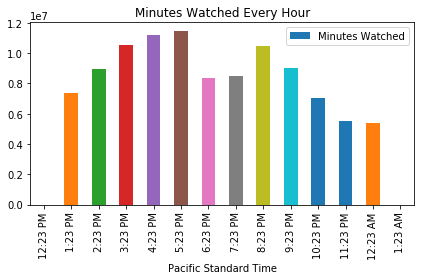

In [22]:
#graph that shows the change in minutes watched at every hourly ping 
#1:30to 5:30 pm our time saw a steady increase. This was 4:30 to 8:30pm when people were most likely at home preparing 
#for their new years plans. 
ninja_scrape.plot(kind ='bar', x= 'Pacific Standard Time', y= 'Minutes Watched', grid = False, title = 'Minutes Watched Every Hour')
plt.tight_layout()
plt.savefig('/Users/ncabayan/Desktop/final_project_stuff/Graphs/minutes_watched.png')
plt.show()

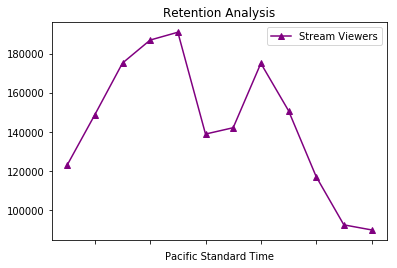

In [23]:
#stream viewers retention analysis. We see a huge drop in viewers from 5:30pm to 6:30pm which is 8:30-9:30pm in the east coast
#which is where the stream was happening. this may be around when people were leaving there homes to go out for new years
#After 8:30pm our time 11:30pm in NY we see a constant drop hour over hour. This may be because people watched
#the stream till midnight and then they were done. It would be safe to say that the stream could have ended at midnight
#it wasn't as if ninja never streams for that long either so it wasn't super special. The cost that went into having
#security for the event till it was done was a sunk cost in a way since viewership dipped so much. We could have
#increased viewers and decreased costs by cutting off the stream right after midnight.
ninja_scrape.plot(kind ='line', x= 'Pacific Standard Time', y= 'Stream Viewers', marker = '^', color = 'purple', grid = False, title = 'Retention Analysis')
plt.savefig('/Users/ncabayan/Desktop/final_project_stuff/Graphs/stream_viewers_retention_analysis.png')
plt.show()

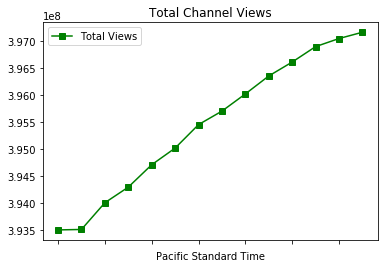

In [24]:
#total channel views
# we can see how the total channel views grew and when we saw the largest and smalletst amounts of growth 
ninja_scrape.plot(kind ='line', x= 'Pacific Standard Time', y= 'Total Views', marker = 's', color = 'green', grid = False, title = 'Total Channel Views')
plt.savefig('/Users/ncabayan/Desktop/final_project_stuff/Graphs/total_channel_views.png')
plt.show()

In [25]:
#import question 1 csv
question1_csv = '/Users/ncabayan/Desktop/final_project_stuff/ninja_twitch_csv/question_1_twitch.csv'
question1_df = pd.read_csv(question1_csv, encoding = 'UTF-8')
question1_df.head()


,What was the first 'vehicle' introduced to Fortnite?,Winner ID 1,Winner ID 2,VOTER ID 1,Voter ID 2
0,0. X-4 Stormwing,18366048.0,1.546294e+09,47862245,1546294341
1,1. All Terrante Kart,93088786.0,1.546294e+09,20985391,1546294296
2,2. Quadcrasher,146065234.0,1.546294e+09,114200165,1546294307
3,3. Shopping Cart,96318761.0,1.546294e+09,201592773,1546294299
4,12/31/18 16:11,162454656.0,1.546294e+09,198095313,1546294294


In [26]:
question_1_vote_count = question1_df["Voter ID 2"].count()
question_1_vote_count

9569

In [27]:
question_1_winner_count = question1_df["Winner ID 1"].count()
question_1_winner_count

8455

In [28]:
question_1_incorrect_count = question_1_vote_count - question_1_winner_count 
question_1_incorrect_count

1114

In [29]:
question_1_stream_viewers = 148687
question_1_stream_viewers

148687

In [30]:
question_1_engagement_rate = (question_1_vote_count/question_1_stream_viewers)*100
question_1_engagement_rate

6.435666870674639

In [31]:
question_1_table = pd.DataFrame ({"Question 1: Total Votes":[question_1_vote_count],
                               "Question 1: Number of Questions Answered Correctly": [question_1_winner_count],
                                "Question 1: Number of Questions Answered Incorrectly": [question_1_incorrect_count],
                                  "Question 1: Engagement Rate": [question_1_engagement_rate],
                              "Total Stream Viewers during Question 1": [question_1_stream_viewers]})
question_1_table

,Question 1: Total Votes,Question 1: Number of Questions Answered Correctly,Question 1: Number of Questions Answered Incorrectly,Question 1: Engagement Rate,Total Stream Viewers during Question 1
0,9569,8455,1114,6.435667,148687


In [32]:
question_1_table["Question 1: Engagement Rate"] = question_1_table["Question 1: Engagement Rate"].map("{:,.2f}%".format)

In [33]:
question_1_table

,Question 1: Total Votes,Question 1: Number of Questions Answered Correctly,Question 1: Number of Questions Answered Incorrectly,Question 1: Engagement Rate,Total Stream Viewers during Question 1
0,9569,8455,1114,6.44%,148687


In [34]:
percent_correct_question_1 = (question_1_winner_count/question_1_vote_count)*100
percent_incorrect_question_1 = (question_1_incorrect_count/question_1_vote_count)*100

question_1_incorrect_vs_correct = pd.DataFrame ({"Percent Correct":[percent_correct_question_1],
                               "Percent Incorrect": [percent_incorrect_question_1]})
question_1_incorrect_vs_correct

,Percent Correct,Percent Incorrect
0,88.35824,11.64176


In [35]:
question_1_incorrect_vs_correct["Percent Correct"] = question_1_incorrect_vs_correct["Percent Correct"].map("{:,.2f}%".format)
question_1_incorrect_vs_correct["Percent Incorrect"] = question_1_incorrect_vs_correct["Percent Incorrect"].map("{:,.2f}%".format)

In [36]:
question_1_incorrect_vs_correct

,Percent Correct,Percent Incorrect
0,88.36%,11.64%


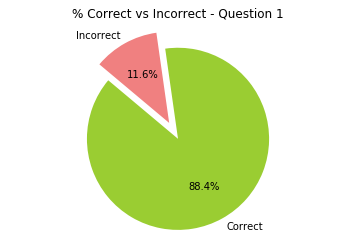

In [37]:
#PIE CHART How many people answer question 1 (at 2:30pm) correctly vs incorrectly
answer_type = ["Correct", "Incorrect"]
answer_count = [question_1_winner_count, question_1_incorrect_count]

colors = ['yellowgreen', 'lightcoral']

explode = (0, 0.2)

plt.pie(answer_count, explode=explode, labels = answer_type, colors = colors, autopct="%1.1f%%", shadow = False, startangle = 140)

plt.axis("equal")

plt.title("% Correct vs Incorrect - Question 1")

plt.savefig('/Users/ncabayan/Desktop/final_project_stuff/Graphs/correct_vs_incorrect_question_1.png')
plt.show()

In [38]:
#import question 2 csv
question2_csv = '/Users/ncabayan/Desktop/final_project_stuff/ninja_twitch_csv/question_2_twitch.csv'
question2_df = pd.read_csv(question2_csv, encoding = 'UTF-8')
question2_df.head()

,What dance did Ninja do to celebrate his first Battle Royale win?,WINNER ID 1,WINNER ID 2,VOTER ID 1,VOTER ID 2
0,0. Pon Pon,43706293.0,1.546302e+09,251431221,1546302058
1,1. The Floss,202537117.0,1.546302e+09,185682707,1546302093
2,2. Gangnam Style,155350217.0,1.546302e+09,84631686,1546302089
3,3. Harlem Shake,207877456.0,1.546302e+09,198713893,1546302075
4,12/31/18 18:20,177034361.0,1.546302e+09,47631976,1546302076


In [39]:
question_2_vote_count = question2_df["VOTER ID 2"].count()

question_2_winner_count = question2_df["WINNER ID 1"].count()

question_2_incorrect_count = question_2_vote_count - question_2_winner_count 

question_2_stream_viewers = 186953

question_2_engagement_rate = (question_2_vote_count/question_2_stream_viewers)*100

In [40]:
question_2_table = pd.DataFrame ({"Question 2: Total Votes":[question_2_vote_count],
                               "Question 2: Number of Questions Answered Correctly": [question_2_winner_count],
                                "Question 2: Number of Questions Answered Incorrectly": [question_2_incorrect_count],
                                  "Question 2: Engagement Rate": [question_2_engagement_rate],
                              "Total Stream Viewers during Question 2": [question_2_stream_viewers]})
question_2_table

,Question 2: Total Votes,Question 2: Number of Questions Answered Correctly,Question 2: Number of Questions Answered Incorrectly,Question 2: Engagement Rate,Total Stream Viewers during Question 2
0,10381,9378,1003,5.552733,186953


In [41]:
question_2_table["Question 2: Engagement Rate"] = question_2_table["Question 2: Engagement Rate"].map("{:,.2f}%".format)

In [42]:
question_2_table

,Question 2: Total Votes,Question 2: Number of Questions Answered Correctly,Question 2: Number of Questions Answered Incorrectly,Question 2: Engagement Rate,Total Stream Viewers during Question 2
0,10381,9378,1003,5.55%,186953


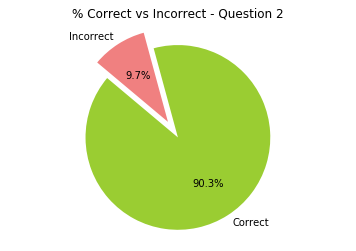

In [43]:
#PIE CHART How many people answer question 2 (at 4:30pm) correctly vs incorrectly
answer_type = ["Correct", "Incorrect"]
answer_count = [question_2_winner_count, question_2_incorrect_count]

colors = ['yellowgreen', 'lightcoral']

explode = (0, 0.2)

plt.pie(answer_count, explode=explode, labels = answer_type, colors = colors, autopct="%1.1f%%", shadow = False, startangle = 140)

plt.axis("equal")

plt.title("% Correct vs Incorrect - Question 2")

plt.savefig('/Users/ncabayan/Desktop/final_project_stuff/Graphs/correct_vs_incorrect_question_2.png')
plt.show()

In [44]:
#import question 3 csv
question3_csv = '/Users/ncabayan/Desktop/final_project_stuff/ninja_twitch_csv/question_3_twitch.csv'
question3_df = pd.read_csv(question3_csv, encoding = 'UTF-8')

question3_df = question3_df.rename(columns = {"Voter ID 1":"VOTER ID 1","Voter ID 2":"VOTER ID 2"
                                             })
question3_df.head()

,What are the three animal statues scattered across Fortnite?,Winner ID 1,Winner ID 2,VOTER ID 1,VOTER ID 2
0,"0. Llama, Corgi, Lobster",14110722.0,1.546323e+09,197025125,1546322913
1,"1. Llama, Fox, Crab",41654863.0,1.546323e+09,54522416,1546322845
2,"2. Camel, Fox, Crab",222677677.0,1.546323e+09,166258169,1546322848
3,"3. Camel, Corgi, Lobster",73694856.0,1.546323e+09,404563984,1546322889
4,1/1/19 0:07,202314089.0,1.546323e+09,176528519,1546322904


In [45]:
ninja_scrape = ninja_scrape_edited_df.rename(columns = {"time":"Pacific Standard Time","total_views":"Total Views", "stream_viewers":"Stream Viewers"})
ninja_scrape

,Pacific Standard Time,Total Views,Stream Viewers
0,12:23 PM,393500921,NaN
1,1:23 PM,393509466,122861.0
2,2:23 PM,394005259,148687.0
3,3:23 PM,394294748,175163.0
4,4:23 PM,394710151,186953.0
5,5:23 PM,395019218,190954.0
6,6:23 PM,395455032,138772.0
7,7:23 PM,395705528,142017.0
8,8:23 PM,396024213,175028.0
9,9:23 PM,396357748,150747.0


In [46]:
question_3_vote_count = question3_df["VOTER ID 2"].count()

question_3_winner_count = question3_df["Winner ID 1"].count()

question_3_incorrect_count = question_3_vote_count - question_3_winner_count 

question_3_stream_viewers = 175028

question_3_engagement_rate = (question_3_vote_count/question_3_stream_viewers)*100

In [47]:
question_3_table = pd.DataFrame ({"Question 3: Total Votes":[question_3_vote_count],
                               "Question 3: Number of Questions Answered Correctly": [question_3_winner_count],
                                "Question 3: Number of Questions Answered Incorrectly": [question_3_incorrect_count],
                                  "Question 3: Engagement Rate": [question_3_engagement_rate],
                              "Total Stream Viewers during Question 3": [question_3_stream_viewers]})
question_3_table

,Question 3: Total Votes,Question 3: Number of Questions Answered Correctly,Question 3: Number of Questions Answered Incorrectly,Question 3: Engagement Rate,Total Stream Viewers during Question 3
0,4276,3578,698,2.443038,175028


In [48]:
question_3_table["Question 3: Engagement Rate"] = question_3_table["Question 3: Engagement Rate"].map("{:,.2f}%".format)

In [49]:
question_3_table

,Question 3: Total Votes,Question 3: Number of Questions Answered Correctly,Question 3: Number of Questions Answered Incorrectly,Question 3: Engagement Rate,Total Stream Viewers during Question 3
0,4276,3578,698,2.44%,175028


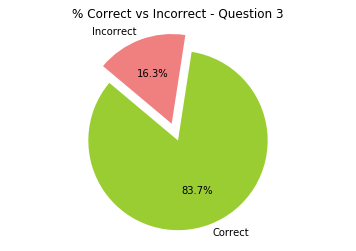

In [50]:
#PIE CHART How many people answer question 3 (at 8:30pm) correctly vs incorrectly
answer_type = ["Correct", "Incorrect"]
answer_count = [question_3_winner_count, question_3_incorrect_count]

colors = ['yellowgreen', 'lightcoral']

explode = (0, 0.2)

plt.pie(answer_count, explode=explode, labels = answer_type, colors = colors, autopct="%1.1f%%", shadow = False, startangle = 140)

plt.axis("equal")

plt.title("% Correct vs Incorrect - Question 3")

plt.savefig('/Users/ncabayan/Desktop/final_project_stuff/Graphs/correct_vs_incorrect_question_3.png')
plt.show()

In [51]:
#import question 4 csv
question4_csv = '/Users/ncabayan/Desktop/final_project_stuff/ninja_twitch_csv/question_4_twitch.csv'
question4_df = pd.read_csv(question4_csv, encoding = 'UTF-8')

question4_df = question4_df.rename(columns = {"Voter ID 1 ":"VOTER ID 1","Voter ID 2":"VOTER ID 2"
                                             })
question4_df.head()

,On March 14 2018 Ninja set a record for all time single player stream viewership while playing Fortnite with whom?,Winner Id 1,Winner ID 2,VOTER ID 1,VOTER ID 2
0,0. Jay-Z,241917924.0,1.546330e+09,101244018,1546329938
1,1. Drake,113319906.0,1.546330e+09,149125,1546329927
2,2. Marshmello,238913683.0,1.546330e+09,168066703,1546329965
3,3. Kendrick Lamar,215720112.0,1.546330e+09,174308167,1546329939
4,1/1/19 2:04,140623117.0,1.546330e+09,184561820,1546329904


In [52]:
list(question4_df.columns.values)

['On March 14 2018  Ninja set a record for all time single player stream viewership while playing Fortnite with whom?',
 'Winner Id 1',
 'Winner ID 2',
 'VOTER ID 1',
 'VOTER ID 2']

In [53]:
question_4_vote_count = question4_df["VOTER ID 2"].count()

question_4_winner_count = question4_df["Winner ID 2"].count()

question_4_incorrect_count = question_4_vote_count - question_4_winner_count 

question_4_stream_viewers = 89641

question_4_engagement_rate = (question_4_vote_count/question_4_stream_viewers)*100


In [54]:
question_4_table = pd.DataFrame ({"Question 4: Total Votes":[question_4_vote_count],
                               "Question 4: Number of Questions Answered Correctly": [question_4_winner_count],
                                "Question 4: Number of Questions Answered Incorrectly": [question_4_incorrect_count],
                                  "Question 4: Engagement Rate": [question_4_engagement_rate],
                              "Total Stream Viewers during Question 4": [question_4_stream_viewers]})
question_4_table

,Question 4: Total Votes,Question 4: Number of Questions Answered Correctly,Question 4: Number of Questions Answered Incorrectly,Question 4: Engagement Rate,Total Stream Viewers during Question 4
0,3310,3200,110,3.692507,89641


In [55]:
question_4_table["Question 4: Engagement Rate"] = question_4_table["Question 4: Engagement Rate"].map("{:,.2f}%".format)

In [56]:
question_4_table

,Question 4: Total Votes,Question 4: Number of Questions Answered Correctly,Question 4: Number of Questions Answered Incorrectly,Question 4: Engagement Rate,Total Stream Viewers during Question 4
0,3310,3200,110,3.69%,89641


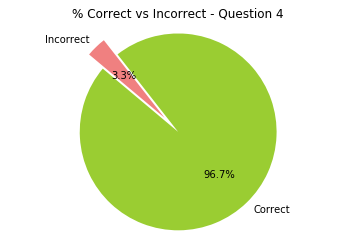

In [57]:
#PIE CHART How many people answer question 4 (at 12:30am) correctly vs incorrectly
answer_type = ["Correct", "Incorrect"]
answer_count = [question_4_winner_count, question_4_incorrect_count]

colors = ['yellowgreen', 'lightcoral']

explode = (0, 0.2)

plt.pie(answer_count, explode=explode, labels = answer_type, colors = colors, autopct="%1.1f%%", shadow = False, startangle = 140)

plt.axis("equal")

plt.title("% Correct vs Incorrect - Question 4")

plt.savefig('/Users/ncabayan/Desktop/final_project_stuff/Graphs/correct_vs_incorrect_question_4.png')
plt.show()

In [58]:
# Combine the data into a single dataset
trivia_question_merged_data_1 = pd.merge(question1_df,question2_df, on="VOTER ID 1")

# Display the data table for preview
trivia_question_merged_data_1.head()

,What was the first 'vehicle' introduced to Fortnite?,Winner ID 1,Winner ID 2,VOTER ID 1,Voter ID 2,What dance did Ninja do to celebrate his first Battle Royale win?,WINNER ID 1,WINNER ID 2,VOTER ID 2
0,1. All Terrante Kart,93088786.0,1.546294e+09,20985391,1546294296,NaN,196948895.0,1.546302e+09,1546302060
1,2. Quadcrasher,146065234.0,1.546294e+09,114200165,1546294307,NaN,121534302.0,1.546302e+09,1546302057
2,NaN,41383663.0,1.546294e+09,32170860,1546294336,NaN,200927108.0,1.546302e+09,1546302089
3,NaN,127757828.0,1.546294e+09,280488184,1546294336,NaN,126781327.0,1.546302e+09,1546302060
4,NaN,37820317.0,1.546294e+09,237640402,1546294301,NaN,208682191.0,1.546302e+09,1546302078


In [59]:
merged_vote_count_question_1_and_2 = trivia_question_merged_data_1["VOTER ID 1"].count()

print(f"The number of voters that voted for question 1 and then voted for question 2 is {merged_vote_count_question_1_and_2}")

The number of voters that voted for question 1 and then voted for question 2 is 2917


In [60]:
# Combine the data into a single dataset
trivia_question_merged_data_2 = pd.merge(question2_df,question3_df, on="VOTER ID 1")

# Display the data table for preview
trivia_question_merged_data_2.head()

,What dance did Ninja do to celebrate his first Battle Royale win?,WINNER ID 1,WINNER ID 2,VOTER ID 1,VOTER ID 2_x,What are the three animal statues scattered across Fortnite?,Winner ID 1,Winner ID 2,VOTER ID 2_y
0,NaN,80947160.0,1.546302e+09,211931432,1546302066,NaN,22764212.0,1.546323e+09,1546322910
1,NaN,114162154.0,1.546302e+09,127377293,1546302107,NaN,132912052.0,1.546323e+09,1546322849
2,NaN,66110611.0,1.546302e+09,233003186,1546302072,NaN,26969444.0,1.546323e+09,1546322868
3,NaN,211533910.0,1.546302e+09,149019553,1546302144,NaN,216574450.0,1.546323e+09,1546322904
4,NaN,192955697.0,1.546302e+09,20645203,1546302083,NaN,90194183.0,1.546323e+09,1546322882


In [61]:
merged_vote_count_question_2_and_3 = trivia_question_merged_data_2["VOTER ID 1"].count()

print(f"The number of voters that voted for question 2 and then voted for question 3 is {merged_vote_count_question_2_and_3}")

The number of voters that voted for question 2 and then voted for question 3 is 970


In [62]:
# Combine the data into a single dataset
trivia_question_merged_data_3 = pd.merge(question3_df,question4_df, on="VOTER ID 1")

# Display the data table for preview
trivia_question_merged_data_3.head()

,What are the three animal statues scattered across Fortnite?,Winner ID 1,Winner ID 2_x,VOTER ID 1,VOTER ID 2_x,On March 14 2018 Ninja set a record for all time single player stream viewership while playing Fortnite with whom?,Winner Id 1,Winner ID 2_y,VOTER ID 2_y
0,"2. Camel, Fox, Crab",222677677.0,1.546323e+09,166258169,1546322848,NaN,71374796.0,1.546330e+09,1546329904
1,NaN,186603992.0,1.546323e+09,48164469,1546322878,NaN,55166438.0,1.546330e+09,1546329908
2,NaN,255277339.0,1.546323e+09,38074702,1546322883,NaN,261805540.0,1.546330e+09,1546329913
3,NaN,227165581.0,1.546323e+09,118238105,1546322890,NaN,146861229.0,1.546330e+09,1546329909
4,NaN,40193792.0,1.546323e+09,155679874,1546322849,NaN,137293400.0,1.546330e+09,1546329987


In [63]:
merged_vote_count_question_3_and_4 = trivia_question_merged_data_3["VOTER ID 1"].count()

print(f"The number of voters that voted for question 3 and then voted for question 4 is {merged_vote_count_question_3_and_4}")

The number of voters that voted for question 3 and then voted for question 4 is 748


In [64]:
voter_summary = pd.DataFrame ({"Number of people that participated in question 1 and then 2":[merged_vote_count_question_1_and_2],
                               "Number of people that participated in question 2 and then 3": [merged_vote_count_question_2_and_3],
                                "Number of people that participated in question 3 and then 4": [merged_vote_count_question_3_and_4]})
voter_summary

,Number of people that participated in question 1 and then 2,Number of people that participated in question 2 and then 3,Number of people that participated in question 3 and then 4
0,2917,970,748
